In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

folder_training = ['MNIST/training/'+ str(i) +'/' for i in range(2)]
folder_testing = ['MNIST/testing/'+ str(i) +'/' for i in range(2)]

#print(folder_training)
classes = [i for i in range(2)]

def get_data(folder,im_width, label, n_samples):
    file_name = os.listdir(folder)
    x= np.empty((n_samples, im_width**2))
    y= np.empty((n_samples, 1))
    for i in range(n_samples):
        path = folder+file_name[i]
        im = Image.open(path).convert('L')
        im = im.resize((im_width, im_width))
        im_array = np.asarray(im)
        x[i,:] = im_array.reshape(1,-1)
        y[i,0] = classes[label]
    return x, y

In [117]:
im_width = 16
P_per_class = 1000;
x_train = np.empty((P_per_class*2, im_width**2))
y_train = np.empty((P_per_class*2,1))
for i in range(2):
    x_i, y_i = get_data(folder_training[i], im_width, i, P_per_class)
    x_train[i*P_per_class:(i+1)*P_per_class,:] = x_i/255/im_width**2
    y_train[i*P_per_class:(i+1)*P_per_class,:] = y_i
    
print(x_train.shape, y_train.shape)

(2000, 256) (2000, 1)


In [134]:
from autograd import grad
import autograd.numpy as np

def model(x,w):
    return w[0]+np.dot(x,w[1:])

def sigmoid(t):
    return 1/(1+np.exp(-t))

def cross_entropy(w,x,y):
    a = sigmoid(model(x,w))
    ind = np.argwhere(y==0)[:,0]
    cost = -np.sum(np.log(1-a[ind]))
    
    ind = np.argwhere(y==1)[:,0]
    cost -= np.sum(np.log(a[ind]))
    return cost/y.size

def gradient_descent(g,step,max_iter,w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    
    for k in range(max_iter):
        grad_eval = gradient(w) #get the gradient
        grad_eval_norm = grad_eval/np.linalg.norm(grad_eval)  #Normalized gradient descent
        w = w - step*grad_eval_norm
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

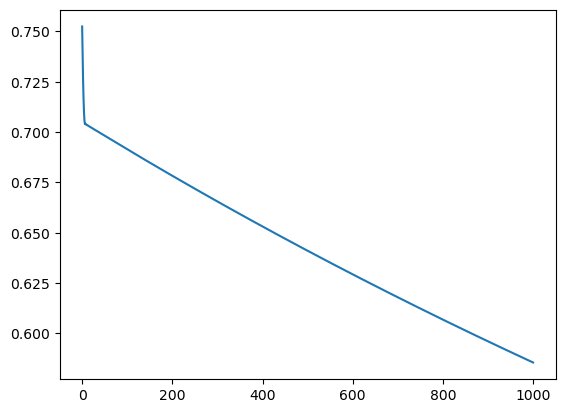

In [135]:
def c(w):
    c = cross_entropy(w,x_train,y_train)
    return c

iter = 1000
w = np.array(np.random.rand(im_width**2 +1,1))
a, b = gradient_descent(c,0.1,iter,w)
plt.figure(0)
plt.plot(b)

In [136]:
im_width = 16
P_per_class = 500;
x_test = np.empty((P_per_class*2, im_width**2))
y_test = np.empty((P_per_class*2,1))
for i in range(2):
    x_i, y_i = get_data(folder_testing[i], im_width, i, P_per_class)
    x_test[i*P_per_class:(i+1)*P_per_class,:] = x_i/255/im_width**2
    y_test[i*P_per_class:(i+1)*P_per_class,:] = y_i
    
print(x_test.shape, y_test.shape)

(1000, 256) (1000, 1)


In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = np.sign(sigmoid(model(x_test, a[iter]))- 0.5)/2 +0.5

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[491   9]
 [  0 500]]
0.991


In [68]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

y_pred2 = classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[494   6]
 [  0 500]]
0.994


/Users/pragya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Implementation for Setosa and Versicolor classes, using Petal length and Petal width as features
['setosa' 'versicolor' 'virginica']
col_0   0   1
row_0        
0      19   0
1       0  14
[[19  0]
 [ 0 14]]
1.0

Implementation for Versicolor and Virginica classes, using Sepal length and Sepal width as features
Where? [0.16777457]
Where? [[1.47558881 0.2170613 ]]
How? [-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[ 33.21720436  29.63929481  26.06138526  22.48347571  18.90556616
  15.32765661  11.74974706   8.17183751   4.59392796   1.0160184
  -2.56189115  -6.1398007   -9.71771025 -13.2956198  -16.87352935
 -20.4514389  -24.02934845 -27.607258   -31.18516755 -34.7630771 ] AAAAAH
col_0   1   2
row_0        
1      13   3
2       6  11
[[13  6]
 [ 3 11]]
0.7272727272727273



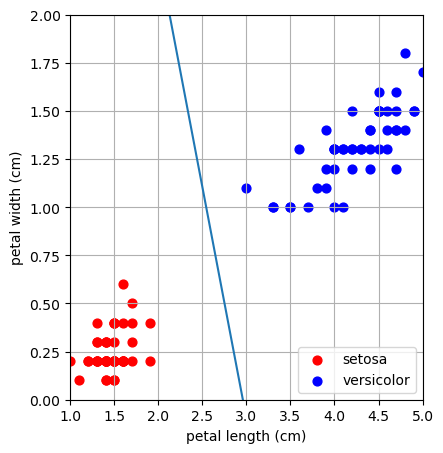

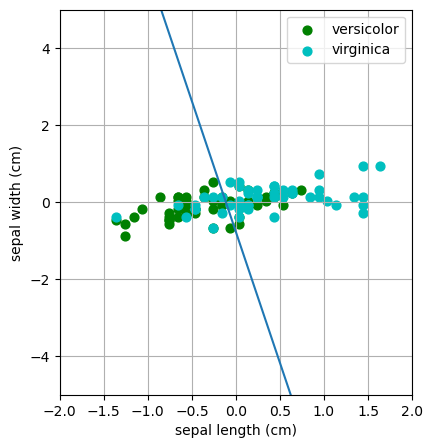

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

iris = datasets.load_iris()

# get labels (for 2 classes only) and features

print("Implementation for Setosa and Versicolor classes, using Petal length and Petal width as features")
y = iris.target
x1 = iris.data[y<2,2] 
x2 = iris.data[y<2,3]

y = y[y<2]
print(iris.target_names)

# scatter plot
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(x1[y==0],x2[y==0],c='r',s=40)
plt.scatter(x1[y==1],x2[y==1],c='b',s=40)
plt.grid(1)
plt.legend([iris.target_names[0],iris.target_names[1]])
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

x=np.array([x1,x2])
x=x.T

# Split the dataset into train test dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# train model
log_regress = linear_model.LogisticRegression()
log_regress.fit(X_train,y_train)

# plot boundary
x1p=np.linspace(1,5,20)
x2p=-(log_regress.intercept_+log_regress.coef_[0][0]*x1p)/log_regress.coef_[0][1]
plt.plot(x1p,x2p)
plt.xlim(1, 5)
plt.ylim(0, 2)

preds = log_regress.predict(X_test)
print(pd.crosstab(preds,y_test))
print(confusion_matrix(y_test,preds))
print(accuracy_score(y_test, preds))

print()
print("Implementation for Versicolor and Virginica classes, using Sepal length and Sepal width as features")

y = iris.target
x1 = iris.data[y>0,0] 
x2 = iris.data[y>0,1]
y = y[y>0]
# scatter plot
plt.figure(figsize=(10, 5))
plt.subplot(1,2,2)
x1-= np.mean(x1)
x2-= np.mean(x2)
plt.scatter(x1[y==1],x2[y==1],c='g',s=40)
plt.scatter(x1[y==2],x2[y==2],c='c',s=40)
plt.grid(1)
plt.legend([iris.target_names[1],iris.target_names[2]])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Normalize Sepal length and width

x=np.array([x1,x2])
x=x.T


# Split the dataset into train test dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# train model
log_regress = linear_model.LogisticRegression()
log_regress.fit(X_train,y_train)

# plot boundary
x1p=np.linspace(-5,5,20)
x2p=-(log_regress.intercept_+log_regress.coef_[0][0]*x1p)/log_regress.coef_[0][1]
print("Where?",log_regress.intercept_)
print("Where?",log_regress.coef_)
print("How?",x1p)
print(x2p,"AAAAAH")
plt.plot(x1p,x2p)

plt.xlim(-2,2)
plt.ylim(-5,5)

#plt.xlim(X_train[:, 0].min(), X_train[:, 0].max())
#plt.ylim(X_train[:, 1].min(), X_train[:, 1].max())
#plt.xlim(1, 10)
#plt.ylim(0, 10)

preds = log_regress.predict(X_test)
print(pd.crosstab(preds,y_test))
print(confusion_matrix(y_test,preds))
print(accuracy_score(y_test, preds))

print()

Petal Length and width, Setosa and Versicolor

Confusion Matrix : 
[[19  0]
 [ 0 14]]

Accuracy Score: 
1.0

Sepal Length and width, Versicolor and Virginica

Confusion Matrix : 
[[13  6]
 [ 3 11]]

Accuracy Score: 
0.7272727272727273


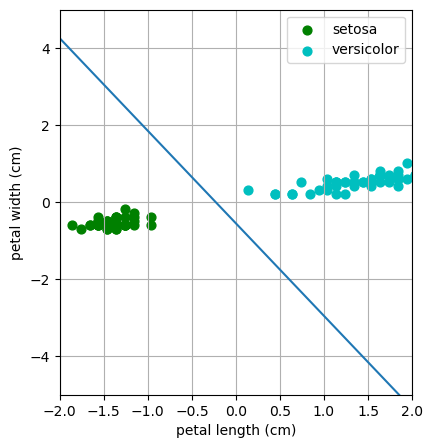

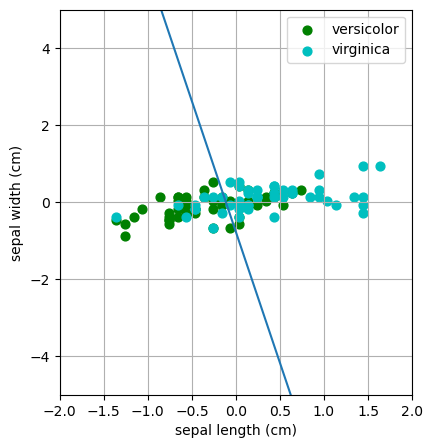

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

iris = datasets.load_iris()

# Function to get x1 and x2 based on features to be selected
def data(target_range, feature1, feature2):
    y=iris.target
    x1 = iris.data[np.isin(y, target_range),feature1] 
    x2 = iris.data[np.isin(y, target_range),feature2]
    #Normalizing the input data
    x1-= np.mean(x1)
    x2-= np.mean(x2)
    y = y[np.isin(y, target_range)]
    x = np.array([x1,x2])
    x = x.T
    return x, y,x1,x2

def scatter_plot_custom(x1,x2,y_range,feature1,feature2,y):
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,y_range[0]+1)
    plt.scatter(x1[y==y_range[0]],x2[y==y_range[0]],c='g',s=40)
    plt.scatter(x1[y==y_range[1]],x2[y==y_range[1]],c='c',s=40)
    plt.grid(1)
    plt.legend([iris.target_names[y_range[0]],iris.target_names[y_range[1]]])
    plt.xlabel(iris.feature_names[feature1])
    plt.ylabel(iris.feature_names[feature2])
    
def data_split(x,y):
    return train_test_split(x, y, test_size=0.33, random_state=42)

def model(x_train,y_train):
    log_regress = linear_model.LogisticRegression()
    log_regress.fit(x_train,y_train)
    return log_regress

def regression_line(log_regress):
    x1p=np.linspace(-5,5,20)
    x2p=-(log_regress.intercept_+log_regress.coef_[0][0]*x1p)/log_regress.coef_[0][1]
    return x1p,x2p

def plot_regression_line(x1p, x2p):
    plt.plot(x1p,x2p)
    plt.xlim(-2,2)
    plt.ylim(-5,5)
    
def evaluation(log_regress,y_test,x_test):
    y_pred=log_regress.predict(x_test)
    print("Confusion Matrix : ")
    print(confusion_matrix(y_test,y_pred))
    print()
    print("Accuracy Score: "),
    print(accuracy_score(y_test,y_pred))
    
def main(feature1, feature2, classes):
    x,y,x1,x2=data(classes,feature1,feature2)
    scatter_plot_custom(x1,x2,classes,feature1,feature2,y)
    
    #Split data
    x_train, x_test, y_train, y_test = data_split(x,y)
    
    #Plot the line dividing data into classes
    x1p,x2p = regression_line(model(x_train,y_train))
    plot_regression_line(x1p,x2p)
    
    evaluation(model(x_train,y_train),y_test,x_test)
    
print("Petal Length and width, Setosa and Versicolor\n")
main(2,3,[0,1])
print()
print("Sepal Length and width, Versicolor and Virginica\n")
main(0,1,[1,2])

